['sg5', 'sg11']
count     8.000000
mean     48.000000
std       0.534522
min      47.000000
25%      48.000000
50%      48.000000
75%      48.000000
max      49.000000
dtype: float64
[27, 71, 114, 156, 198]
count     8.000000
mean     42.500000
std       1.195229
min      41.000000
25%      41.750000
50%      42.500000
75%      43.250000
max      44.000000
dtype: float64


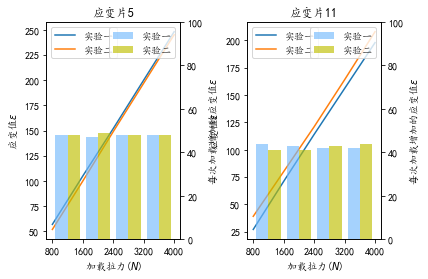

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from pylab import *

sg_xs = [5, 11]
cols = ['sg' + str(i) for i in sg_xs]
print(cols)
df = pd.read_csv('input/data123.csv')

experiments = np.arange(1, 7)
df_exprmnts = [0] * 7
for i in experiments:
    df_exprmnts[i] = df[df['experiment'] == i]

lst1 = df_exprmnts[5]['sg5'].tolist()
lst2 = df_exprmnts[6]['sg5'].tolist()

#解决中文显示问题
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

def vis(lst1, lst2, ax):
    

    dif1 = np.array([0] * 4)
    dif2 = np.array([0] * 4)
    for i in range(4):
        dif1[i] = lst1[i + 1] - lst1[i]
        dif2[i] = lst2[i + 1] - lst2[i]
    ax2 = ax.twinx()
    bar_width = 0.4 * 800
    ax2.bar(np.arange(1200, 4001, 800) - bar_width  / 2, dif1,width = bar_width,  color = 'xkcd:sky blue', alpha = 0.65)
    ax2.bar(np.arange(1200, 4001, 800) + bar_width / 2, dif2,width = bar_width,  color = 'y', alpha = 0.65)
    ax2.set_ylim(0, 100)
    ax2.legend(['实验一','实验二'])
    ax2.set_ylabel(r'每次加载增加的应变值$\varepsilon$')

    ax.plot(np.arange(800, 4001, 800), lst1)
    ax.plot(np.arange(800, 4001, 800), lst2)
    ax.legend(['实验一','实验二'])
    ax.set_ylabel(r'应变值$\varepsilon$')
    ax.set_xlabel(r'加载拉力($N$)')
    ax.set_xticks(np.arange(800, 4001, 800))

    print(pd.Series(list(dif1) + list(dif2)).describe())

    





count     8.000000
mean     42.500000
std       1.195229
min      41.000000
25%      41.750000
50%      42.500000
75%      43.250000
max      44.000000
dtype: float64
[27, 71, 114, 156, 198]
count     8.000000
mean     42.500000
std       1.195229
min      41.000000
25%      41.750000
50%      42.500000
75%      43.250000
max      44.000000
dtype: float64


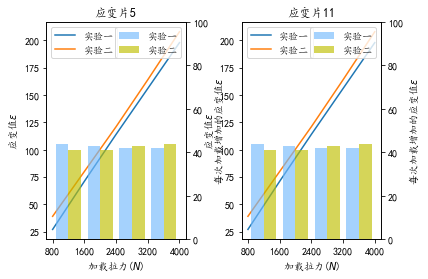

In [9]:

fig = plt.figure()
ax = fig.add_subplot(121)
vis(lst1, lst2, ax)
ax.set_title('应变片5')

ax3 = fig.add_subplot(122)
lst1 = df_exprmnts[5]['sg11'].tolist()
print(lst1)
lst2 = df_exprmnts[6]['sg11'].tolist()
vis(lst1, lst2, ax3)
ax3.set_title('应变片11')
subplots_adjust(wspace = .4)
plt.show()